### Data Distribution


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys


In [3]:
data = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/osimertinib_main_smiles.csv')

In [4]:
print(data.describe())

       Smiles (RDKit Mol)  MACCS_sim_score  ECFP4_sim_score  \
count                 0.0        61.000000        61.000000   
mean                  NaN         0.922246         0.865016   
std                   NaN         0.063878         0.089416   
min                   NaN         0.740000         0.667000   
25%                   NaN         0.908000         0.822000   
50%                   NaN         0.939000         0.867000   
75%                   NaN         0.954000         0.907000   
max                   NaN         1.000000         1.000000   

       MCSS_rdkit_sim_score  Standard Value  
count             61.000000       61.000000  
mean               0.889098     1249.858852  
std                0.124740     6069.070767  
min                0.592000        0.010000  
25%                0.857000        2.090000  
50%                0.949000       17.800000  
75%                0.974000      122.000000  
max                1.000000    45000.000000  


In [5]:
from scipy.stats import skew, kurtosis

skewness = skew(data['Standard Value'])
kurt = kurtosis(data['Standard Value'])

print(f"Skewness: {skewness}, Kurtosis: {kurt}")


Skewness: 6.495256490440113, Kurtosis: 43.21496434887237


In [6]:
percentiles = data['Standard Value'].quantile([0.25, 0.5, 0.75])
print("Percentili (25°, 50°, 75°):")
print(percentiles)

IQR = percentiles[0.75] - percentiles[0.25]
print(f"IQR (Interquartile Range): {IQR}")
outliers_lower = data[data['Standard Value'] < (percentiles[0.25] - 1.5 * IQR)]
outliers_upper = data[data['Standard Value'] > (percentiles[0.75] + 1.5 * IQR)]


Percentili (25°, 50°, 75°):
0.25      2.09
0.50     17.80
0.75    122.00
Name: Standard Value, dtype: float64
IQR (Interquartile Range): 119.91


In [10]:
Q1 = data['Standard Value'].quantile(0.25)
Q3 = data['Standard Value'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

upper_bound

301.865

In [7]:

data_no_outliers = data[data['Standard Value'] <= 362.86]
print(f"Dimensione del dataset dopo la rimozione degli outliers: {data_no_outliers.shape}")

data_no_outliers = data_no_outliers.copy()
data_no_outliers.loc[:, 'Standard Value Log'] = np.log(data_no_outliers['Standard Value'] + 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_no_outliers.loc[:, 'Standard Value Scaled'] = scaler.fit_transform(data_no_outliers[['Standard Value Log']])

from scipy.stats import skew, kurtosis

skew_value = skew(data_no_outliers['Standard Value Scaled'])
kurt_value = kurtosis(data_no_outliers['Standard Value Scaled'])

print(f"Skewness dopo trasformazione: {skew_value}")
print(f"Kurtosis dopo trasformazione: {kurt_value}")



Dimensione del dataset dopo la rimozione degli outliers: (52, 11)
Skewness dopo trasformazione: 0.13612531531788422
Kurtosis dopo trasformazione: -1.335160441870719


In [8]:
print(data_no_outliers[['Standard Value Log', 'Standard Value Scaled']].head())


   Standard Value Log  Standard Value Scaled
0            0.009950               0.000000
1            0.067659               0.010265
2            0.157004               0.026157
3            0.165514               0.027671
4            0.182322               0.030660


In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
dir_path = '/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/hyper'
files = os.listdir(dir_path)

for filename in files:
    if filename.endswith('.csv'):
        data = pd.read_csv(os.path.join(dir_path, filename))
        if 'R2' in data.columns and 'Q2' in data.columns:
            data = data.sort_values(by='PC')
            plt.figure()
            data['R2'].plot(label='R2')
            data['Q2'].plot(label='Q2')
            plt.title(f'{filename} - R2 e Q2')
            plt.xlabel('Number of components')
            plt.ylabel('Score')
            plt.grid()
            plt.legend()
            output_image_path = os.path.join(dir_path, f'{filename}_R2_Q2_plot.png')
            plt.savefig(output_image_path)
            plt.close()

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

dir_path = "/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/nuovo"
files = os.listdir(dir_path)

for filename in files:
    if filename.endswith(".csv"):
        file_path = os.path.join(dir_path, filename)
        data = pd.read_csv(file_path)

        if {"R2", "Q2", "PC"}.issubset(data.columns):
            data = data.sort_values(by="PC")

            plt.figure(figsize=(8, 6))
            plt.plot(data["PC"], data["R2"], marker="o", linestyle="-", color="blue", label="R2")
            plt.plot(data["PC"], data["Q2"], marker="s", linestyle="-", color="orange", label="Q2")

            plt.title(f"{filename} - R2 e Q2")
            plt.xlabel("numbero of PC")
            plt.ylabel("Score")
            plt.legend()
            plt.grid(True)

            output_image_path = os.path.join(dir_path, f"{filename}_R2_Q2_plot.png")
            plt.savefig(output_image_path, dpi=300)
            plt.close()


Table image saved to /home/federica/LAB2/chembl1865/egfr_qsar/last/model/model_results.png


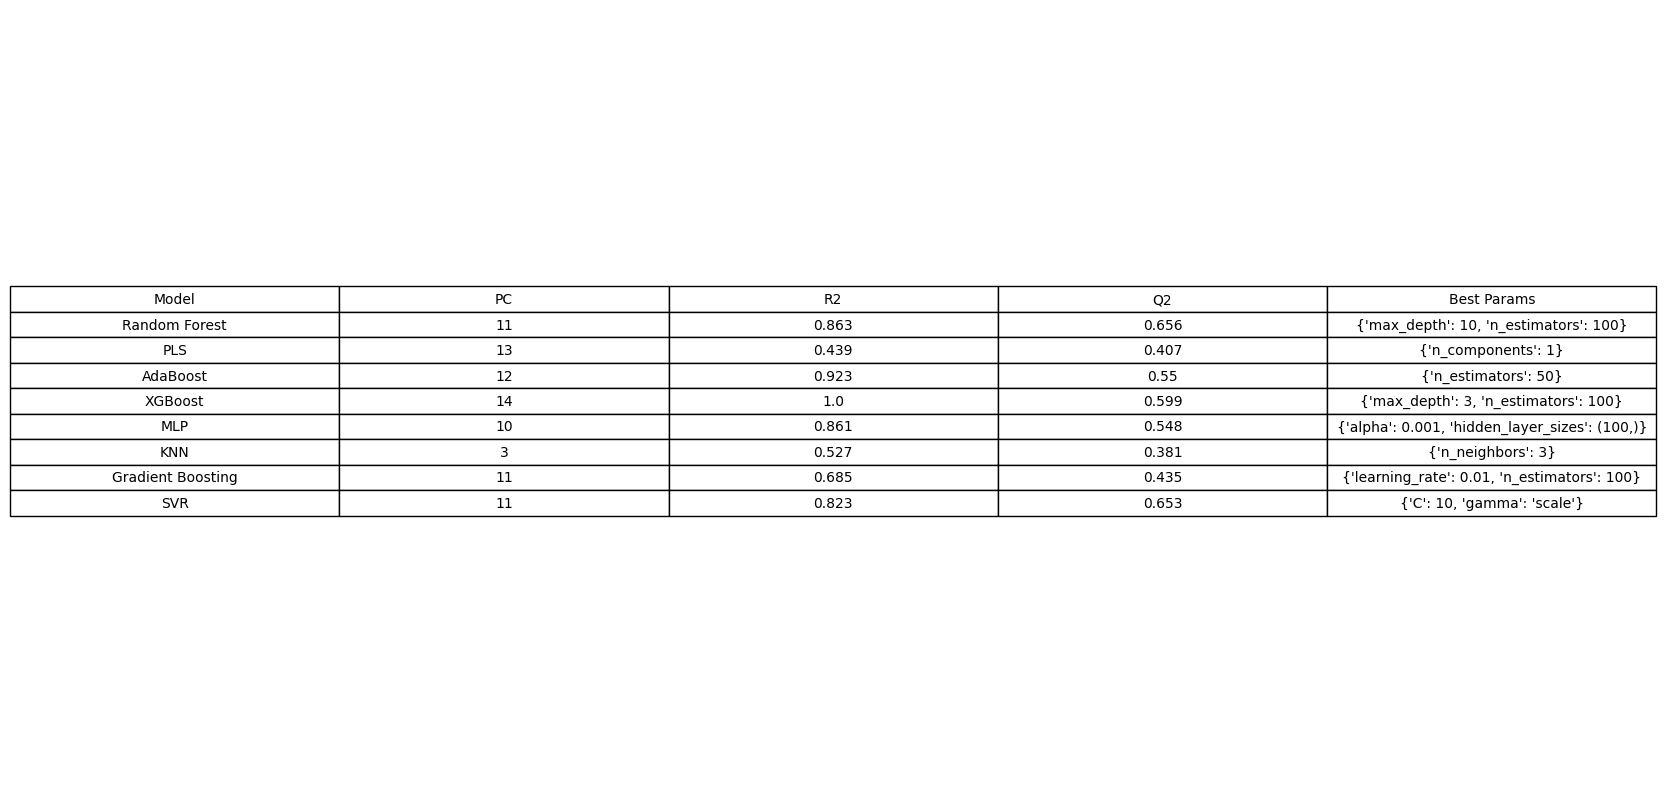

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Data
data = {
    'Model': ['Random Forest', 'PLS', 'AdaBoost', 'XGBoost', 'MLP', 'KNN', 'Gradient Boosting', 'SVR'],
    'PC': [11, 13, 12, 14, 10, 3, 11, 11],
    'R2': [0.863, 0.439, 0.923, 1.000, 0.861, 0.527, 0.685, 0.823],
    'Q2': [0.656, 0.407, 0.550, 0.599, 0.548, 0.381, 0.435, 0.653],
    'Best Params': [
        "{'max_depth': 10, 'n_estimators': 100}",
        "{'n_components': 1}",
        "{'n_estimators': 50}",
        "{'max_depth': 3, 'n_estimators': 100}",
        "{'alpha': 0.001, 'hidden_layer_sizes': (100,)}",
        "{'n_neighbors': 3}",
        "{'learning_rate': 0.01, 'n_estimators': 100}",
        "{'C': 10, 'gamma': 'scale'}"
    ]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

output_dir = '/home/federica/LAB2/chembl1865/egfr_qsar/last/model'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'model_results.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)

print(f"Table image saved to {output_file}")

In [ ]:
paths = '/home/federica/LAB2/chembl1865/egfr_qsar/selected_based_on_similarity_to_training_set.csv'
df= pd.read_csv(paths)
df = df.drop(columns=['Count(Reference)','Assay ChEMBL ID', 'Assay Description', 'Assay Type',
       'BAO Label', 'Assay Organism', 'Assay Cell Type',
       'Assay Variant Mutation', 'Target ChEMBL ID', 'Target Name',
       'Target Organism', 'Target Type',
       'Source Description', 'Cell ChEMBL ID', 'Standard Text Value', 'family',
       'accession', 'protein_class_desc', 'mutation', 'mutant',
       'Accession Code', 'Population', 'Quality', 'Class'])

df = df.rename(columns={'Fitmol': 'Molecule ChEMBL ID', 'Mean(MACCS_sim_score)':'MACCS_sim_score',
                       'Mean(ECFP4_sim_score)':'ECFP4_sim_score', 'Mean(MCSS_rdkit_sim_score)':'MCSS_rdkit_sim_score',})
df['Smiles (RDKit Mol)'] = ' '


df.to_csv('/home/federica/LAB2/chembl1865/egfr_qsar/selected_training.csv', index=False)



In [13]:
from rdkit import Chem
import pandas as pd
sdf_file = "/home/federica/Downloads/db2_2.sdf"
suppl = Chem.SDMolSupplier(sdf_file)
data = []
for mol in suppl:
    if mol is not None:
        props = mol.GetPropsAsDict()
        props["Smiles"] = Chem.MolToSmiles(mol)
        data.append(props)
df = pd.DataFrame(data)
df['Smiles (RDKit Mol)'] = ' '
df.to_csv("/home/federica/LAB2/chembl1865/egfr_qsar/95molecule.csv", index=False)

df.head()


,Molecule ChEMBL ID,Standard Type,Standard Relation,Standard Value,Standard Units,Document ChEMBL ID,mutant,class,Smiles,Smiles (RDKit Mol)
0,CHEMBL4290812,IC50,'=',0.3,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
1,CHEMBL4282688,IC50,'=',0.7,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2ncc(OC)c(-c3cn(C)c4ccccc34)...,
2,CHEMBL4279057,IC50,'=',0.7,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
3,CHEMBL4293126,IC50,'=',0.8,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
4,CHEMBL4277911,IC50,'=',0.8,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,


In [14]:
df.drop(columns=['mutant','class'], inplace=True)
df.to_csv('/home/federica/LAB2/chembl1865/egfr_qsar/95molecule.csv', index=False)

In [15]:
df

,Molecule ChEMBL ID,Standard Type,Standard Relation,Standard Value,Standard Units,Document ChEMBL ID,Smiles,Smiles (RDKit Mol)
0,CHEMBL4290812,IC50,'=',0.3,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
1,CHEMBL4282688,IC50,'=',0.7,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2ncc(OC)c(-c3cn(C)c4ccccc34)...,
2,CHEMBL4279057,IC50,'=',0.7,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
3,CHEMBL4293126,IC50,'=',0.8,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
4,CHEMBL4277911,IC50,'=',0.8,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
...,...,...,...,...,...,...,...,...
90,CHEMBL4206604,Ki,'=',161.0,nM,CHEMBL4177539,CC(=O)N1CC[C@H](Nc2nc(Nc3ccc(N4CCN(C)CC4)cc3)c...,
91,CHEMBL4207425,Ki,'=',161.0,nM,CHEMBL4177539,C=CC(=O)N[C@@H]1CCN(c2nc(Nc3ccc(N4CCN(C)CC4)cc...,
92,CHEMBL4213741,Ki,'=',164.0,nM,CHEMBL4177539,C=CC(=O)N1CC[C@H](Nc2nc(Nc3ccc(N4CCN(C)CC4)cc3...,
93,CHEMBL4873830,IC50,'=',198.5,nM,CHEMBL4831496,O=C(O)c1ccccc1Nc1nc(Nc2ccc(OCC(=O)N3CCOCC3)cc2...,


In [7]:
from rdkit import Chem
import pandas as pd
sdf_file = "/home/federica/Downloads/db2_2.sdf"
suppl = Chem.SDMolSupplier(sdf_file)
data = []
for mol in suppl:
    if mol is not None:
        props = mol.GetPropsAsDict()
        props["Smiles"] = Chem.MolToSmiles(mol)
        data.append(props)
df = pd.DataFrame(data)
df

,Molecule ChEMBL ID,Standard Type,Standard Relation,Standard Value,Standard Units,Document ChEMBL ID,mutant,class,Smiles
0,CHEMBL4290812,IC50,'=',0.3,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...
1,CHEMBL4282688,IC50,'=',0.7,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2ncc(OC)c(-c3cn(C)c4ccccc34)...
2,CHEMBL4279057,IC50,'=',0.7,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...
3,CHEMBL4293126,IC50,'=',0.8,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...
4,CHEMBL4277911,IC50,'=',0.8,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...
...,...,...,...,...,...,...,...,...,...
90,CHEMBL4206604,Ki,'=',161.0,nM,CHEMBL4177539,T790M/L858R,4,CC(=O)N1CC[C@H](Nc2nc(Nc3ccc(N4CCN(C)CC4)cc3)c...
91,CHEMBL4207425,Ki,'=',161.0,nM,CHEMBL4177539,T790M/L858R,4,C=CC(=O)N[C@@H]1CCN(c2nc(Nc3ccc(N4CCN(C)CC4)cc...
92,CHEMBL4213741,Ki,'=',164.0,nM,CHEMBL4177539,T790M/L858R,4,C=CC(=O)N1CC[C@H](Nc2nc(Nc3ccc(N4CCN(C)CC4)cc3...
93,CHEMBL4873830,IC50,'=',198.5,nM,CHEMBL4831496,L858R/T790M,4,O=C(O)c1ccccc1Nc1nc(Nc2ccc(OCC(=O)N3CCOCC3)cc2...


In [12]:
df_class_1 = df.loc[df['class'] == 1]
df_class_1['Smiles (RDKit Mol)'] = ' '
df_class_1.drop(columns=['mutant','class'], inplace=True)
df_class_1.to_csv('/home/federica/LAB2/chembl1865/egfr_qsar/41molecule.csv', index=False)

/tmp/ipykernel_739569/3692610680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_1['Smiles (RDKit Mol)'] = ' '
/tmp/ipykernel_739569/3692610680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_1.drop(columns=['mutant','class'], inplace=True)


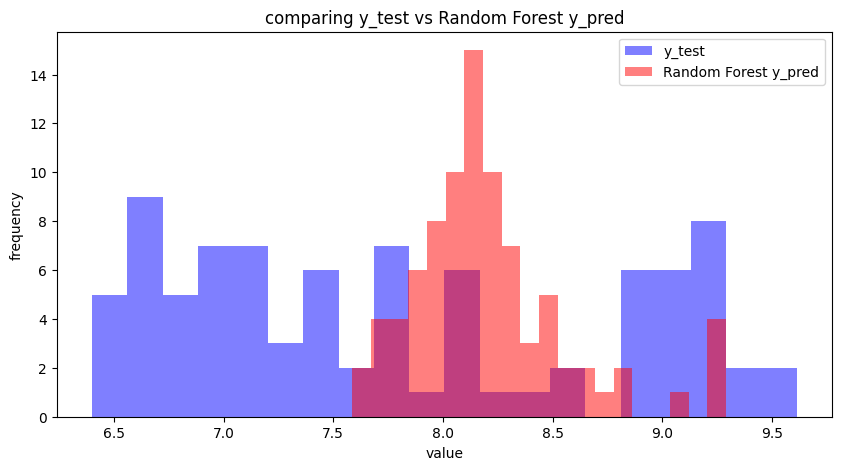

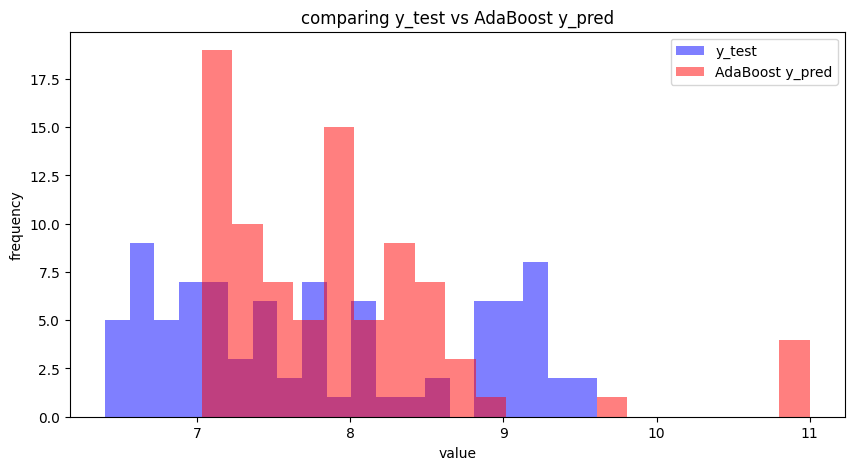

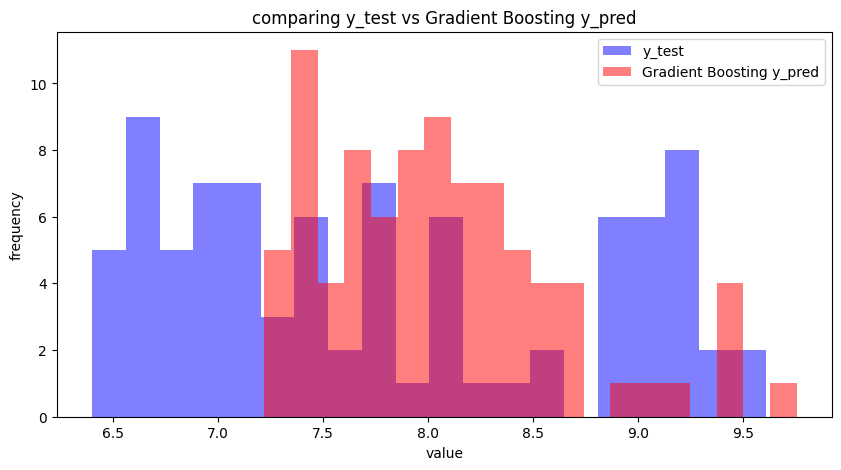

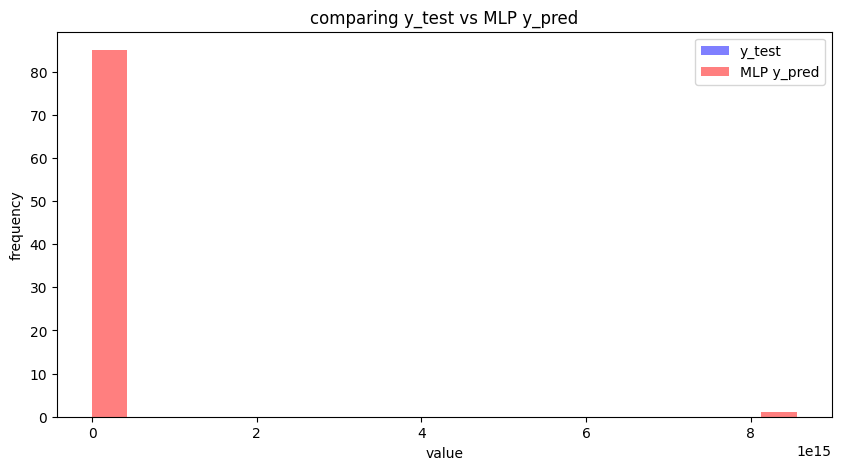

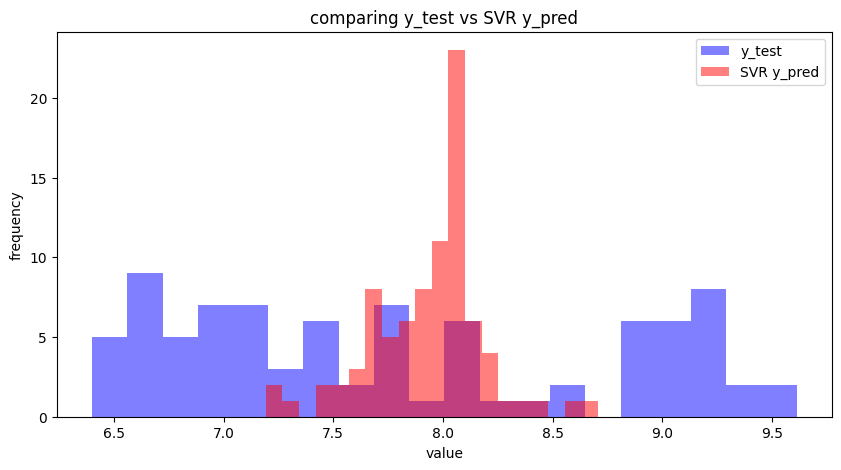

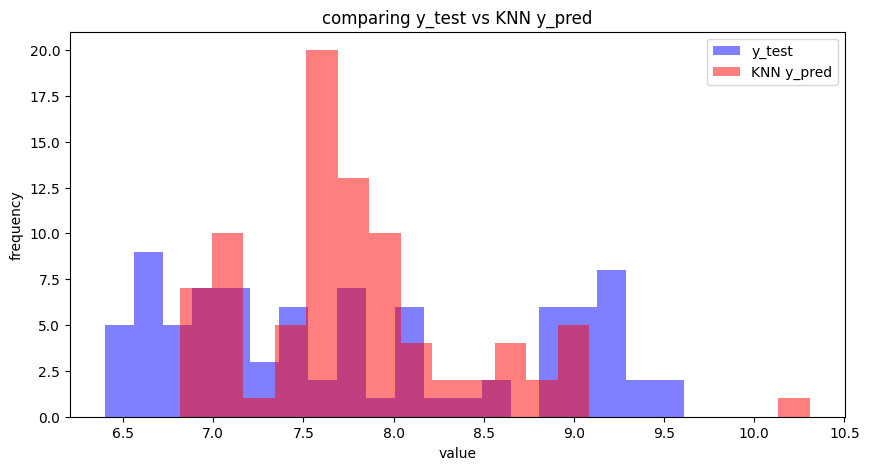

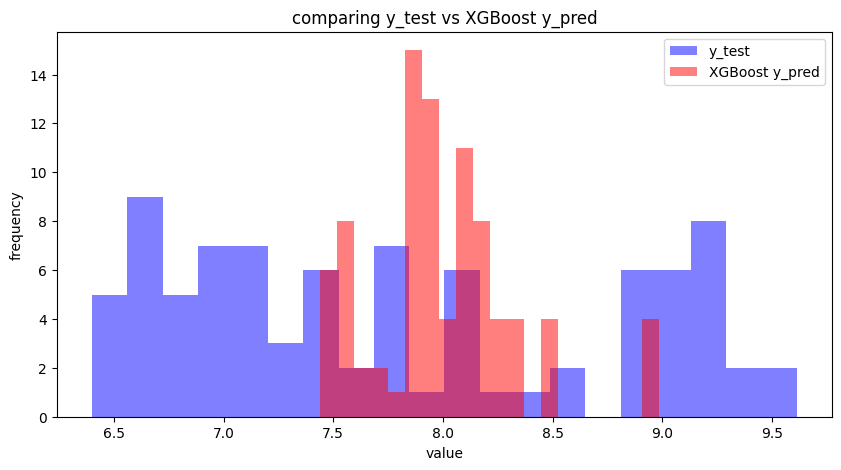

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

result_dir = "/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/predictions"


modelli = ["Random Forest", "AdaBoost", "Gradient Boosting", "MLP", "SVR", "KNN", "XGBoost"]

for modello in modelli:
    file_path = os.path.join(result_dir, f"{modello}_predictions_retrain.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        plt.figure(figsize=(10, 5))
        plt.hist(df["y_test"], bins=20, alpha=0.5, label="y_test", color="blue")
        plt.hist(df["y_pred"], bins=20, alpha=0.5, label=f"{modello} y_pred", color="red")
        plt.xlabel("value")
        plt.ylabel("frequency")
        plt.title(f"comparing y_test vs {modello} y_pred")
        plt.legend()
        plt.show()


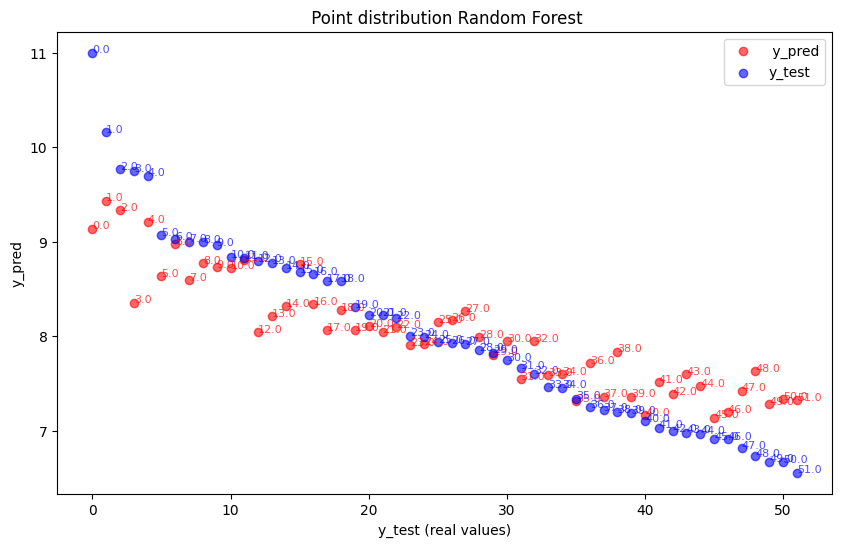

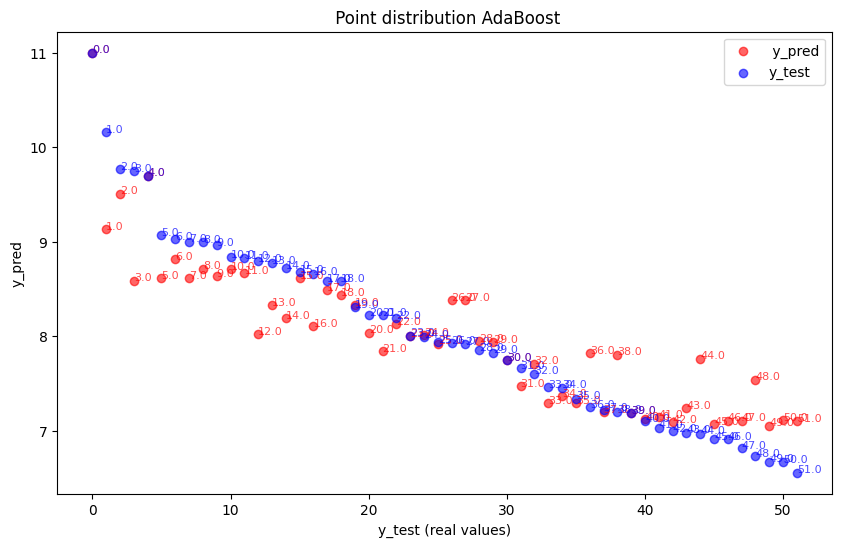

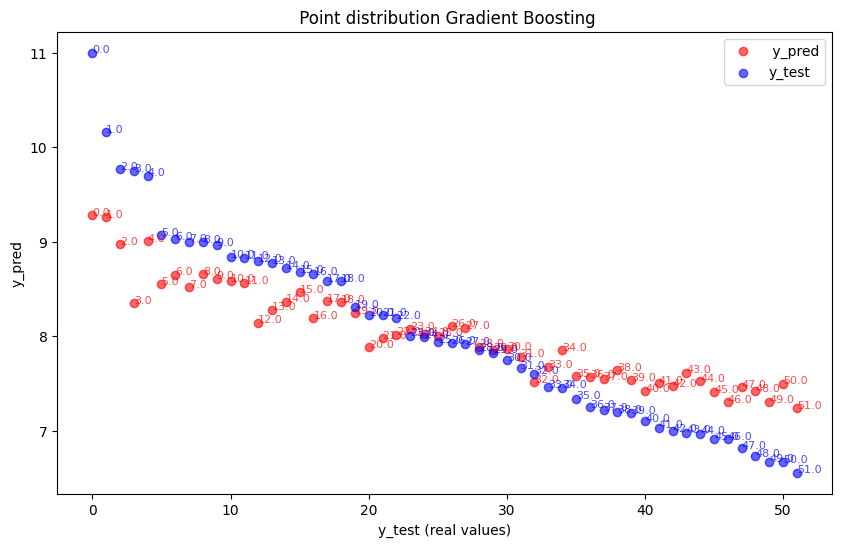

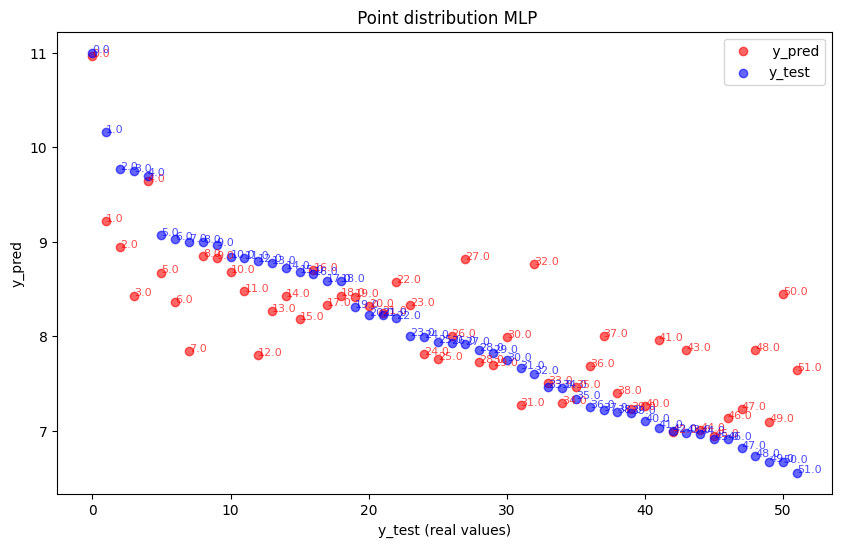

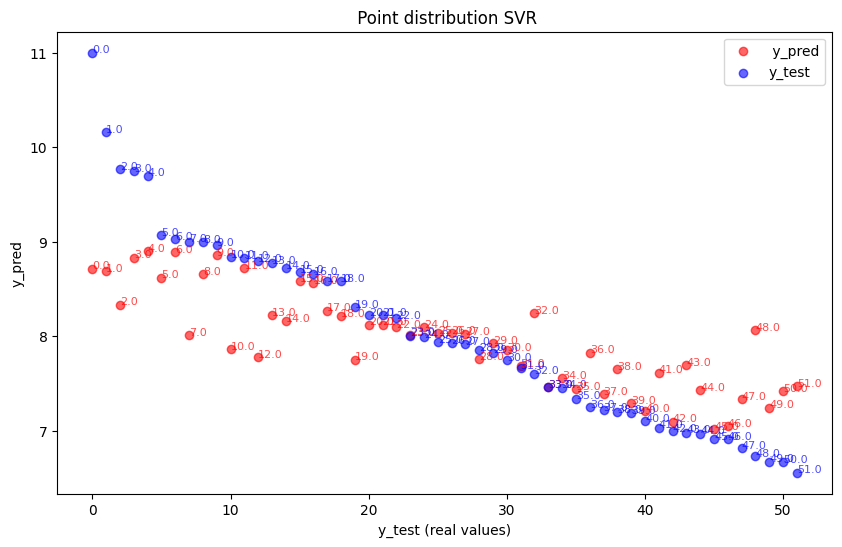

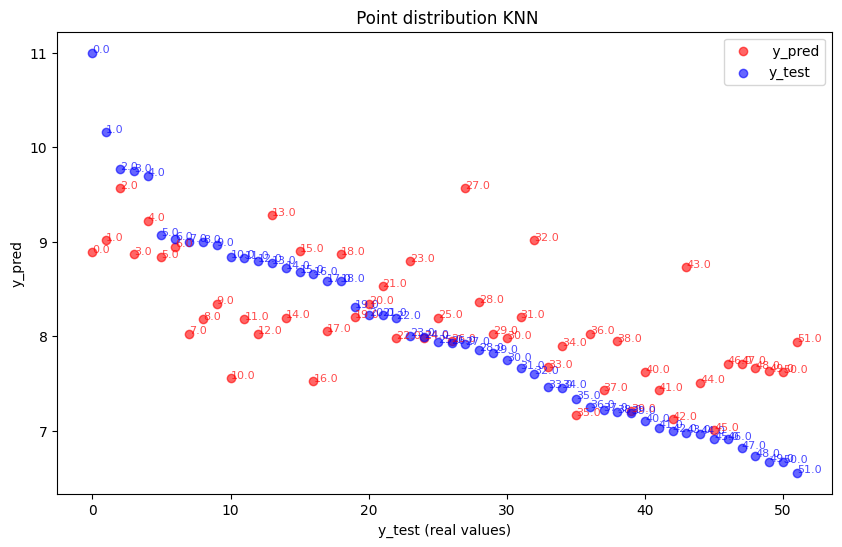

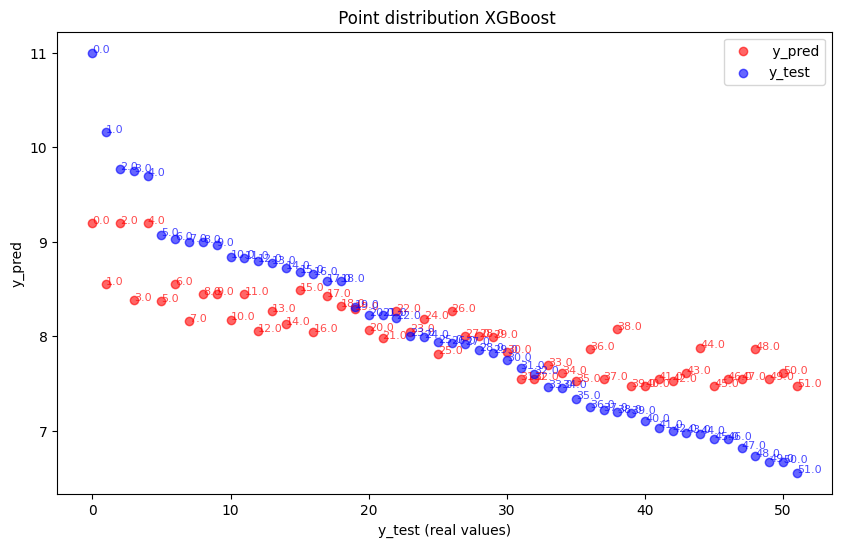

In [47]:
import numpy as np
import matplotlib.pyplot as plt

modelli = ["Random Forest", "AdaBoost", "Gradient Boosting", "MLP", "SVR", "KNN", "XGBoost"]
result_dir='/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/predictions/'

for modello in modelli:
    file_path = os.path.join(result_dir, f"{modello}_predictions_test.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if 'ID' not in df.columns:
            df['ID'] = df.index

        plt.figure(figsize=(10, 6))
        plt.scatter(df["ID"], df["y_pred"], color="red", alpha=0.6, label=" y_pred")
        plt.scatter(df["ID"], df["y_test"], color="blue", alpha=0.6, label="y_test")


        for i,row in df.iterrows():
            plt.annotate(str(row["ID"]), (row["ID"], row["y_pred"]), fontsize=8, alpha=0.7, color="red")
            plt.annotate(str(row["ID"]), (row["ID"], row["y_test"]), fontsize=8, alpha=0.7, color="blue")

        plt.xlabel("y_test (real values)")
        plt.ylabel("y_pred")
        plt.title(f" Point distribution {modello}")
        plt.legend()
        plt.savefig(f"/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/predictions/test/{modello}_samples.png")


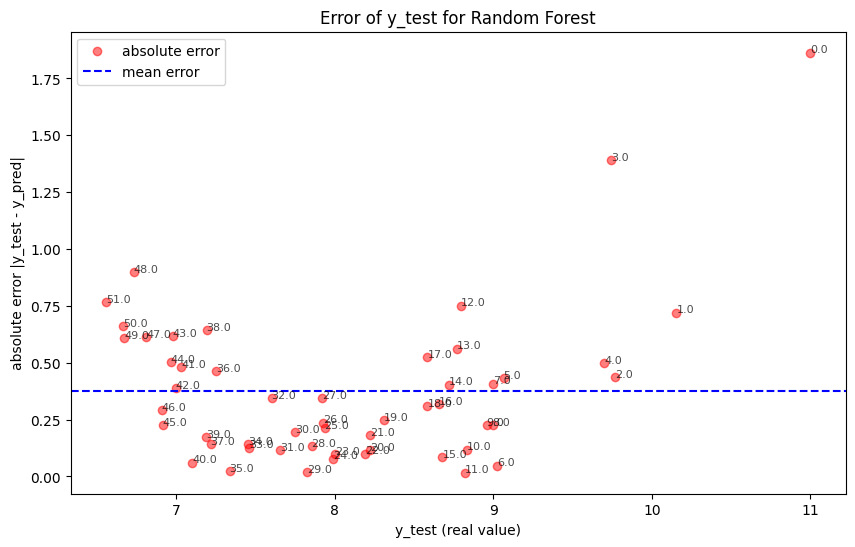

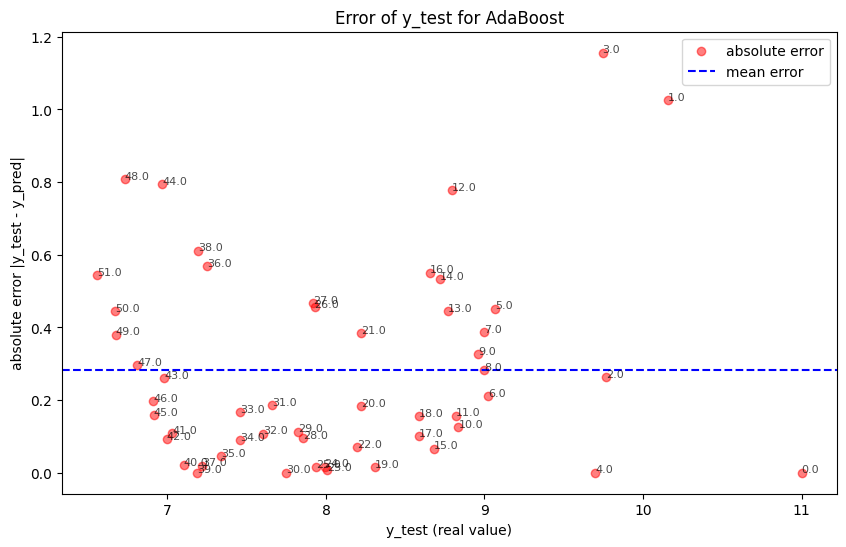

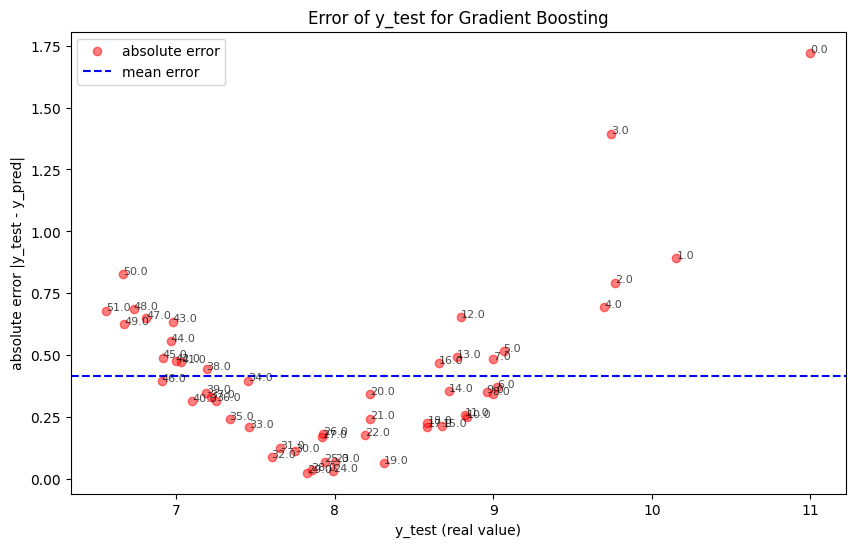

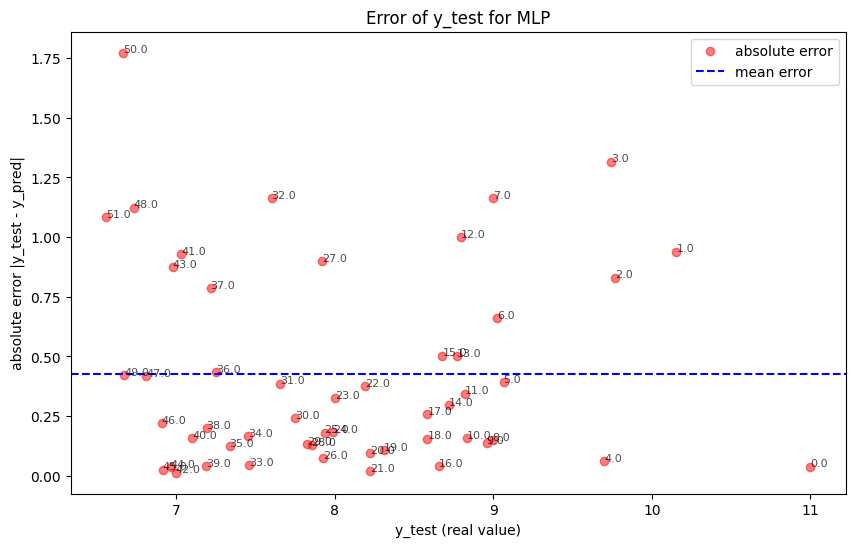

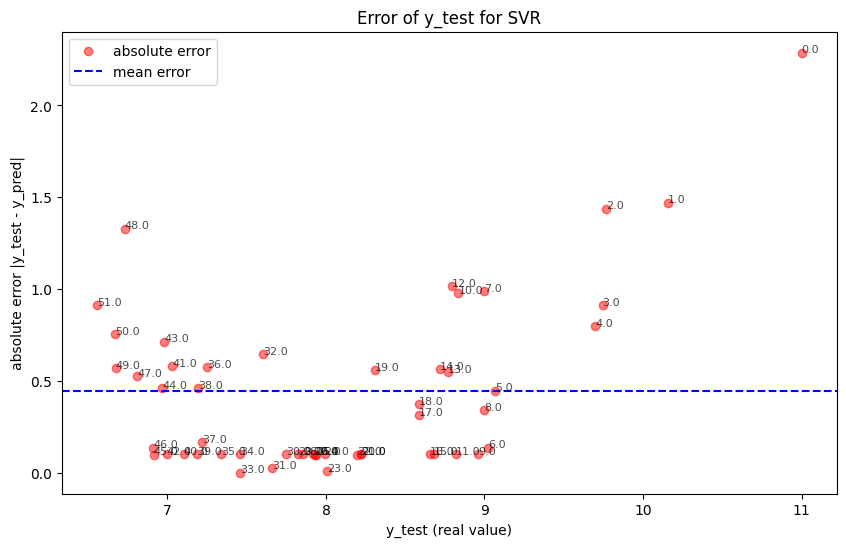

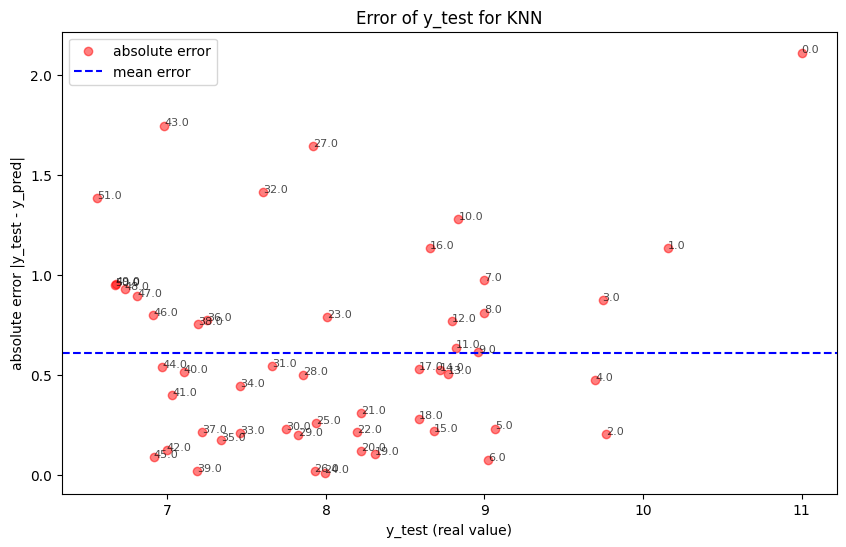

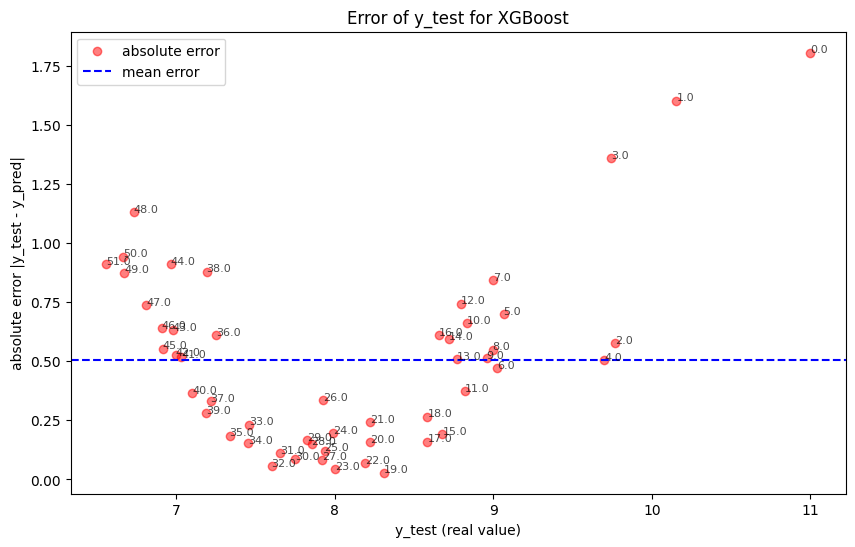

In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

modelli = ["Random Forest", "AdaBoost", "Gradient Boosting", "MLP", "SVR", "KNN", "XGBoost"]
result_dir = '/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/predictions/'

for modello in modelli:
    file_path = os.path.join(result_dir, f"{modello}_predictions_test.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if "ID" not in df.columns:
            df["ID"] = df.index  
        df["errore"] = np.abs(df["y_test"] - df["y_pred"])

        plt.figure(figsize=(10, 6))
        plt.scatter(df["y_test"], df["errore"], alpha=0.5, color="red", label="absolute error")
        plt.axhline(y=np.mean(df["errore"]), color="blue", linestyle="--", label="mean error")

        for i, row in df.iterrows():
            plt.annotate(str(row["ID"]), (row["y_test"], row["errore"]), fontsize=8, alpha=0.7)

        plt.xlabel("y_test (real value)")
        plt.ylabel("absolute error |y_test - y_pred|")
        plt.title(f"Error of y_test for {modello}")
        plt.legend()
        plt.savefig(f"/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/predictions/test/{modello}_absolute_error.png")


In [57]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/log_standard_value.csv')

/tmp/ipykernel_739569/1328157839.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["log_standard_value_x"], label="Y_train", shade=True, color="blue")
/tmp/ipykernel_739569/1328157839.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["log_standard_value_y"], label="Y_test", shade=True, color="red")


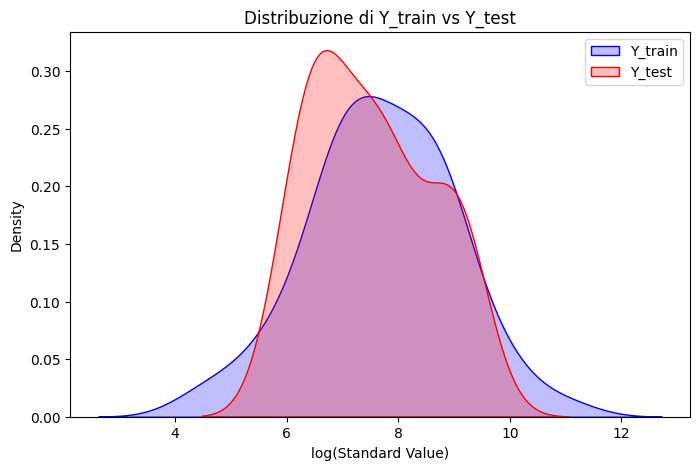

In [58]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["log_standard_value_x"], label="Y_train", shade=True, color="blue")
sns.kdeplot(df["log_standard_value_y"], label="Y_test", shade=True, color="red")

plt.xlabel("log(Standard Value)")
plt.ylabel("Density")
plt.title("Distribuzione di Y_train vs Y_test")
plt.legend()
plt.show()

In [61]:
import pandas as pd

# Carica i file CSV
y_train = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/pca_tsne/input_data_retrain_y_52.csv')
y_test = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/pca_tsne/input_data_retrain_y_41.csv')
X_train = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/pca_tsne/input_data_retrain_X_52.csv')
X_test = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/pca_tsne/input_data_retrain_X_41.csv')

# Verifica delle dimensioni
print(f"Dimensioni y_train: {y_train.shape}")
print(f"Dimensioni y_test: {y_test.shape}")
print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")



Dimensioni y_train: (52, 1)
Dimensioni y_test: (37, 1)
Dimensioni X_train: (2080, 1)
Dimensioni X_test: (1480, 1)


Dimensioni X_train: (62, 2047)
Dimensioni X_test: (27, 2047)
  Molecule ChEMBL ID Standard Type Standard Relation  Standard Value  \
0      CHEMBL4792967          IC50               '='            0.17   
1      CHEMBL4460261          IC50               '='           65.00   
2      CHEMBL5175316          IC50               '='           87.00   
3      CHEMBL4098967          IC50               '='            1.90   
4      CHEMBL4790568          IC50               '='            1.01   

  Standard Units                                             Smiles  \
0             nM  C=CC(=O)Nc1cc(Nc2ncc(C(F)(F)F)c(-c3cn(C4COC4)c...   
1             nM  C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...   
2             nM  COc1ccc(C(=O)Nc2cc(Nc3nccc(-c4cn(C)c5ccccc45)n...   
3             nM  C=CC(=O)Nc1cc(Nc2nccc(-c3cn4c5c(cccc35)CCC4)n2...   
4             nM  C#CCn1cc(-c2ccnc(Nc3cc(NC(=O)C=C)c(N(C)CCN(C)C...   

   rdkit_MaxAbsEStateIndex  rdkit_MaxEStateIndex  rdkit_MinAbsEStateIndex  \
0 

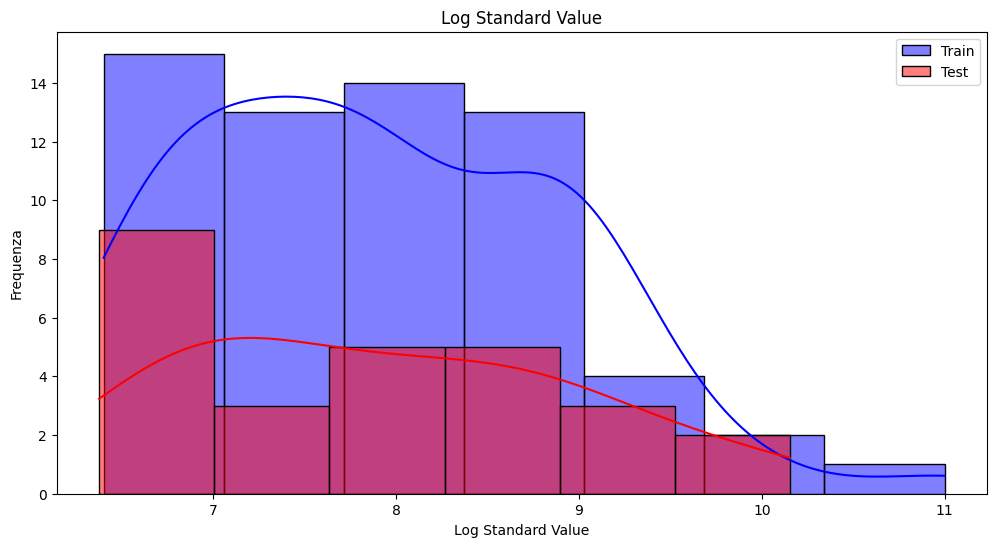

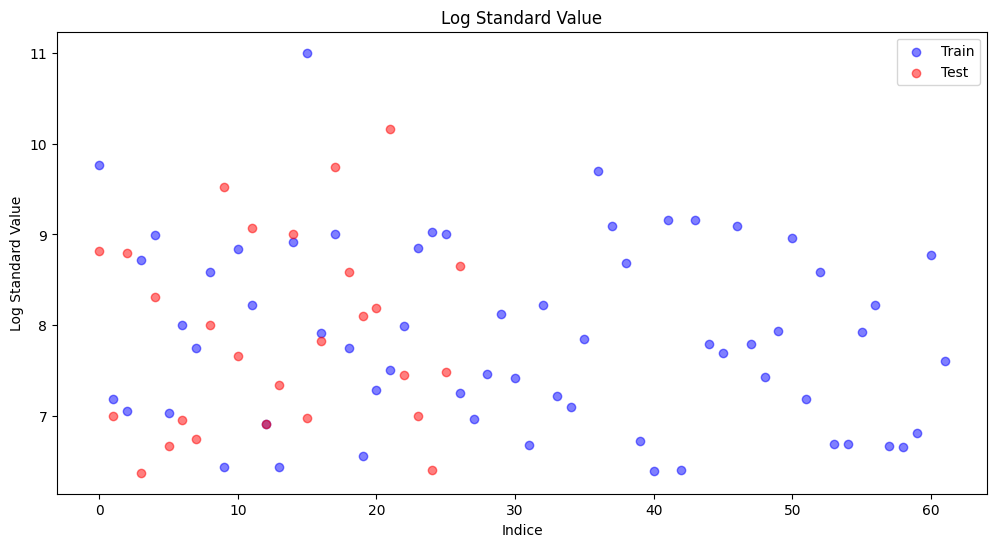

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Carica i file CSV
X_train = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/x.csv')
X_test = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/y.csv')

# Verifica delle dimensioni
print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")

# Visualizza le prime righe dei DataFrame
print(X_train.head())
print(X_test.head())

# Statistiche descrittive
print(X_train.describe())
print(X_test.describe())

plt.figure(figsize=(12, 6))
sns.histplot(X_train['Log Standard Value'], kde=True, color='blue', label='Train')
sns.histplot(X_test['Log Standard Value'], kde=True, color='red', label='Test')
plt.title('Log Standard Value')
plt.xlabel('Log Standard Value')
plt.ylabel('Frequenza')
plt.legend()
plt.show()

# Scatter plot delle componenti principali
plt.figure(figsize=(12, 6))
plt.scatter(range(len(X_train)), X_train['Log Standard Value'], color='blue', label='Train', alpha=0.5)
plt.scatter(range(len(X_test)), X_test['Log Standard Value'], color='red', label='Test', alpha=0.5)
plt.title('Log Standard Value')
plt.xlabel('Indice')
plt.ylabel('Log Standard Value')
plt.legend()
plt.show()

Dimensioni X_train_truncated: (1480, 1)
Dimensioni X_test_truncated: (1480, 1)
   pca_scaled_X_train
0            4.653691
1           -0.925211
2            1.386680
3            1.466570
4           -1.132400
   pca_scaled_X_test
0          -2.828842
1          -0.160912
2           0.093823
3          -0.133663
4           0.238904
       pca_scaled_X_train
count         1480.000000
mean            -0.017466
std              0.888683
min             -3.627329
25%             -0.310392
50%             -0.006313
75%              0.288263
max              5.332861
       pca_scaled_X_test
count        1480.000000
mean            0.003382
std             0.750293
min            -4.333626
25%            -0.323166
50%             0.014009
75%             0.335026
max             4.470979


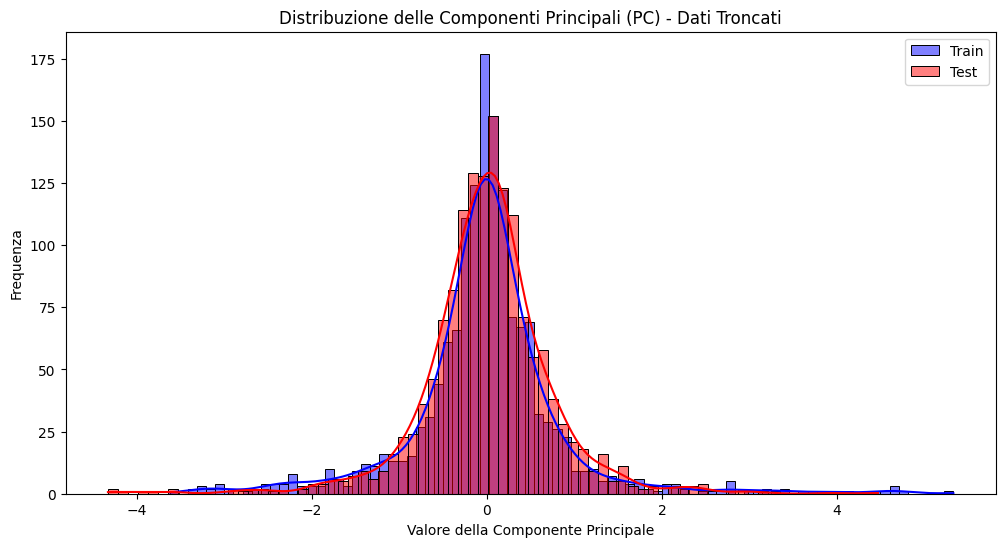

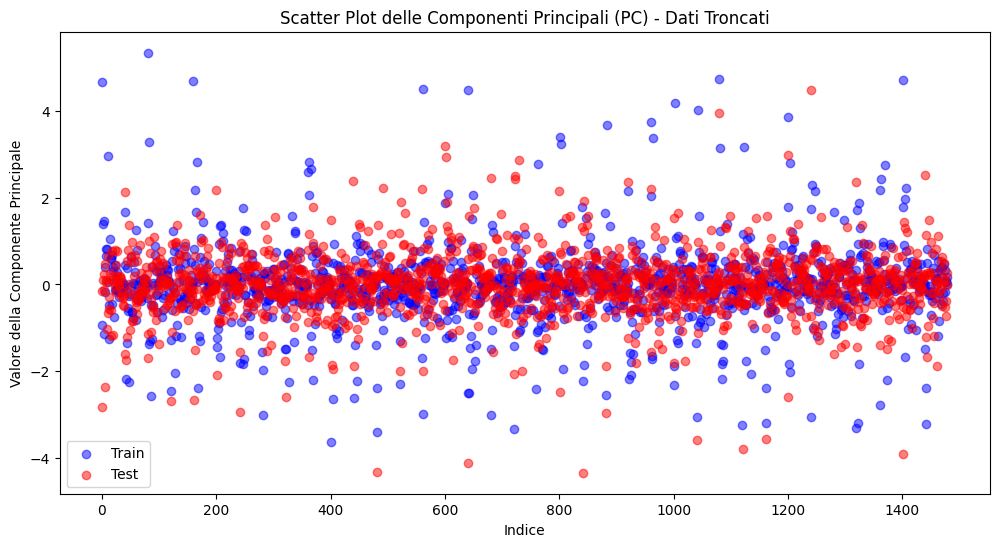

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica i file CSV
X_train = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/pca_tsne/input_data_retrain_X_52.csv')
X_test = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/pca_tsne/input_data_retrain_X_41.csv')

# Trova l'intersezione degli indici
common_indices = X_train.index.intersection(X_test.index)

# Tronca i dati per mantenere solo gli indici comuni
X_train_truncated = X_train.loc[common_indices]
X_test_truncated = X_test.loc[common_indices]

# Verifica delle dimensioni
print(f"Dimensioni X_train_truncated: {X_train_truncated.shape}")
print(f"Dimensioni X_test_truncated: {X_test_truncated.shape}")

# Visualizza le prime righe dei DataFrame troncati
print(X_train_truncated.head())
print(X_test_truncated.head())

# Statistiche descrittive
print(X_train_truncated.describe())
print(X_test_truncated.describe())

# Distribuzione delle componenti principali
plt.figure(figsize=(12, 6))
sns.histplot(X_train_truncated['pca_scaled_X_train'], kde=True, color='blue', label='Train')
sns.histplot(X_test_truncated['pca_scaled_X_test'], kde=True, color='red', label='Test')
plt.title('Distribuzione delle Componenti Principali (PC) - Dati Troncati')
plt.xlabel('Valore della Componente Principale')
plt.ylabel('Frequenza')
plt.legend()
plt.show()

# Scatter plot delle componenti principali
plt.figure(figsize=(12, 6))
plt.scatter(range(len(X_train_truncated)), X_train_truncated['pca_scaled_X_train'], color='blue', label='Train', alpha=0.5)
plt.scatter(range(len(X_test_truncated)), X_test_truncated['pca_scaled_X_test'], color='red', label='Test', alpha=0.5)
plt.title('Scatter Plot delle Componenti Principali (PC) - Dati Troncati')
plt.xlabel('Indice')
plt.ylabel('Valore della Componente Principale')
plt.legend()
plt.show()

Dimensioni X_train_truncated: (1480, 1)
Dimensioni X_test_truncated: (1480, 1)
   pca_scaled_X_train
0            4.653691
1           -0.925211
2            1.386680
3            1.466570
4           -1.132400
   pca_scaled_X_test
0          -2.828842
1          -0.160912
2           0.093823
3          -0.133663
4           0.238904
       pca_scaled_X_train
count         1480.000000
mean            -0.017466
std              0.888683
min             -3.627329
25%             -0.310392
50%             -0.006313
75%              0.288263
max              5.332861
       pca_scaled_X_test
count        1480.000000
mean            0.003382
std             0.750293
min            -4.333626
25%            -0.323166
50%             0.014009
75%             0.335026
max             4.470979


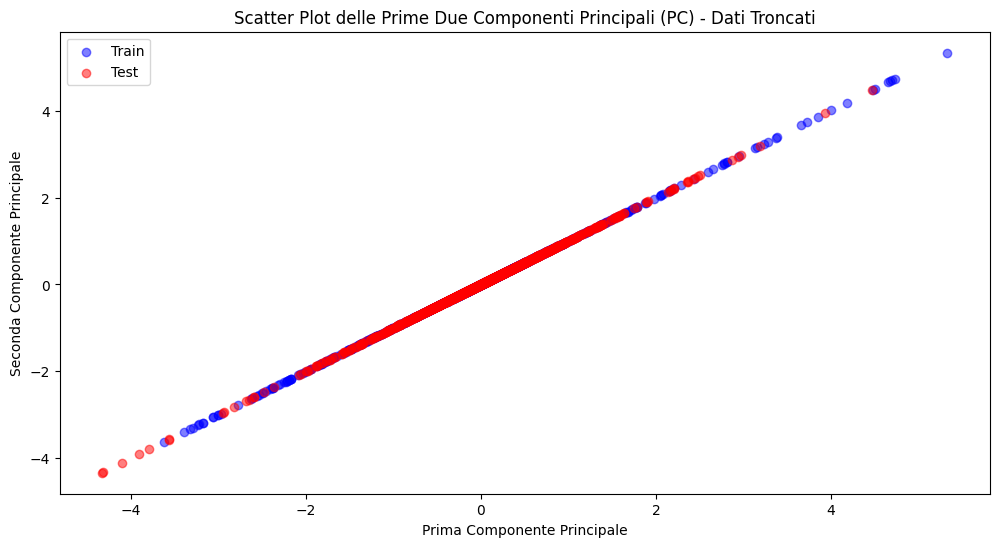

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica i file CSV
X_train = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/pca_tsne/input_data_retrain_X_52.csv')
X_test = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/pca_tsne/input_data_retrain_X_41.csv')

# Trova l'intersezione degli indici
common_indices = X_train.index.intersection(X_test.index)

# Tronca i dati per mantenere solo gli indici comuni
X_train_truncated = X_train.loc[common_indices]
X_test_truncated = X_test.loc[common_indices]

# Verifica delle dimensioni
print(f"Dimensioni X_train_truncated: {X_train_truncated.shape}")
print(f"Dimensioni X_test_truncated: {X_test_truncated.shape}")

# Visualizza le prime righe dei DataFrame troncati
print(X_train_truncated.head())
print(X_test_truncated.head())

# Statistiche descrittive
print(X_train_truncated.describe())
print(X_test_truncated.describe())

# Scatter plot delle prime due componenti principali
plt.figure(figsize=(12, 6))
plt.scatter(X_train_truncated['pca_scaled_X_train'], X_train_truncated['pca_scaled_X_train'], color='blue', label='Train', alpha=0.5)
plt.scatter(X_test_truncated['pca_scaled_X_test'], X_test_truncated['pca_scaled_X_test'], color='red', label='Test', alpha=0.5)
plt.title('Scatter Plot delle Prime Due Componenti Principali (PC) - Dati Troncati')
plt.xlabel('Prima Componente Principale')
plt.ylabel('Seconda Componente Principale')
plt.legend()
plt.show()